In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import os

In [2]:
#Mike's blob plotting function, just in case?

def plot_blobs(img,blobs):
    """
    Plot a set of blobs on an image.
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 

    ax.imshow(img, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
        ax.add_patch(c)

In [3]:
#load your folder containing files you wanna look at here

def read_images(folder):
    """
    
    """
    img_array=[]
    for x in os.listdir(folder):   
        this_file = os.path.join(folder,x)
        if x[0] == 'a':
            y = (Image.open(this_file))
            img_array.append(np.array(y))
            continue
    #img_array = np.array(img_array)
    return img_array

y = read_images("test_mip/") #makes a list of arrays
#wooooot

(-0.5, 7999.5, 4999.5, -0.5)

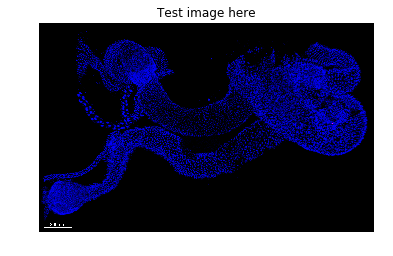

In [36]:
#test that your files are in there and look okay (?)

plt.imshow(y[9])
plt.title("Test image here")
plt.axis('off')
#Woot woot

(-0.5, 3999.5, 5999.5, -0.5)

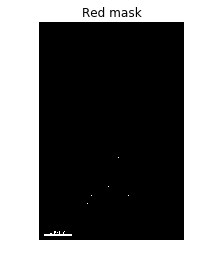

In [37]:
#Sample mask. Adjust where the 50 is until you see the dots you want to identify

ph3_mask = y[7][:,:,0] > 50
#y[list entry][image array stuff]

y[7][:,:,0] = ph3_mask*255
y[7][:,:,1] = ph3_mask*255
y[7][:,:,2] = ph3_mask*255
    
plt.imshow(y[7])
plt.title('Red mask')
plt.axis('off')


In [9]:
#test the blob identifier on an image and test that you're getting an array out

image_gray = rgb2gray(y[9])

# blob_log
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
        
plot_blobs(y[9],blobs_log)
print(blobs_log.shape) #this tells us the shape of the array - very important
#a,b,r; no color information

(208, 3)


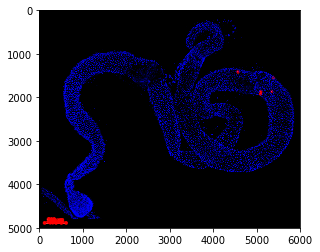

In [8]:
#another test without the array test in it

image_gray = rgb2gray(y[1]) #convert to gray

# blob_log
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
        
plot_blobs(y[1],blobs_log)

In [12]:
#Gets the colors assoicated with each blob

#Lets us filter the blobs based on color in the next step. Then we can try measuring and stuff.

def get_blob_color(image,blob):

    # Grab circle center (a,b) and radius (r)
    a, b, r = blob
    
    # Grab total size of 
    nx, ny = image.shape[0:2]
    
    # Create a *circular* mask.  
    y,x = np.ogrid[-a:nx-a,-b:ny-b] #draws a square
    mask = x*x + y*y <= r*r
    
    num_pixels = np.sum(mask)
    red = np.sum(image[mask,0])/num_pixels
    green = np.sum(image[mask,1])/num_pixels
    blue = np.sum(image[mask,2])/num_pixels
    
    return red, green, blue

blob_colors = []

for line in blobs_log:
    blob_colors.append(get_blob_color(y[1], line))
    
    
blob_colors = np.array(blob_colors)
print(blob_colors.shape)

/Users/stephanievanbeuge/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/stephanievanbeuge/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/stephanievanbeuge/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


(208, 3)


[array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([140.36697248, 140.36697248, 140.36697248]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array([217.56880734, 217.56880734, 217.56880734]), array(

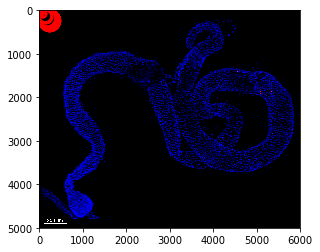

In [13]:
#filters out everything that isn't white because of the scale bars haha

def filter_blobs(blob_colors):
    
    
    
    new_blobs = []
    for line in blob_colors:
        if line[0] < 255 and line[1] < 255 and line[2] < 255: #calls on color value from blob colors
            new_blobs.append(line)
            
    return new_blobs

filt = filter_blobs(blob_colors)
print(filt)

plot_blobs(y[1], filt)


In [14]:
#Counts the filtered spots

def spot_counter(filt_col_blobs):
    
    num_not_red = 0
    num_red = 0

    for b in filt_col_blobs:
        if b[0] < 50:
            num_not_red += 1
        else:
            num_red += 1

    return num_not_red, num_red

arg = spot_counter(filt)
print(arg)

(77, 71)


In [ ]:
print(y)

#This attempts to put it all together and fails miserably. It's all the above steps mashed into one loop
# This cell thinks for a long time then gets very angry, beware.

for x in range(0,10,1):
    image_gray = rgb2gray(y[x])

    # blob_log
    blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    for line in blobs_log:
        blob_colors = []
        blob_colors.append(get_blob_color(y[x], blobs_log))
    filtered = filter_blobs(blob_colors)
    plot_blobs(y[x], filtered)
    count = spot_counter(filtered)
    print(count)

(-0.5, 5999.5, 4999.5, -0.5)

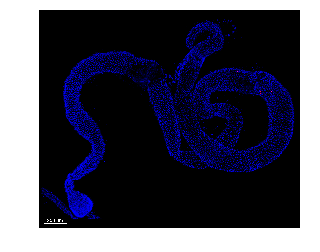

In [33]:
#Pull one image to mess with for the next part so it doesn't take a lifetime and a half

image = y[1]

plt.imshow(image)
plt.axis('off')

Text(0.5, 1.0, 'histogram of gray values')

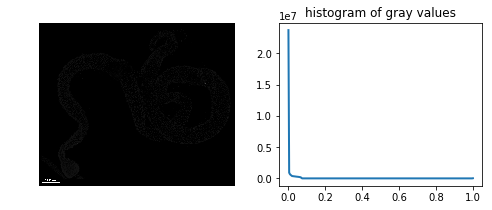

In [20]:
#Trying to measure or identify gut tube area??

from skimage.exposure import histogram

image_gray = rgb2gray(image)
hist, hist_centers = histogram(image_gray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image_gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

(-0.5, 5999.5, 4999.5, -0.5)

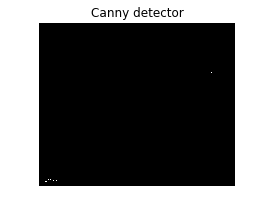

In [23]:
from skimage.feature import canny

image_gray = rgb2gray(image)
edges = canny(image_gray)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')  #BOOO

(-0.5, 5999.5, 4999.5, -0.5)

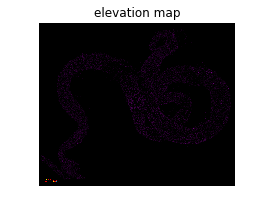

In [28]:
from skimage.filters import sobel

image_gray = rgb2gray(image)
elevation_map = sobel(image_gray)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off') 

(-0.5, 5999.5, 4999.5, -0.5)

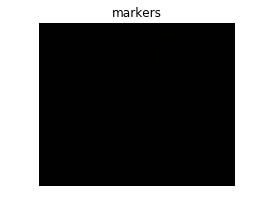

In [26]:
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')

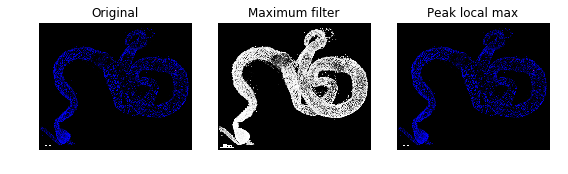

In [29]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = img_as_float(image)

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()